In [2]:
!pip install py-polar-codes

  Created wheel for py-polar-codes: filename=py_polar_codes-1.2.2-py3-none-any.whl size=22941 sha256=249533bbe15c15971e82e2794faed3804e3dc154236129720e9e2f6536079c45
  Stored in directory: /root/.cache/pip/wheels/2d/de/72/c2376d6da5c139b52ca3312e54c512a44a6cf1ebd3069e0008
Successfully built py-polar-codes


In [3]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9673 sha256=6885506fe20c92ff9e4fc6bc95cbd781fa01a888de83132fb2a0615afc11a06f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from polarcodes import *
import pandas as pd
import math
import os

In [7]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path = "/content/drive/My Drive/Colab Notebooks/"
os.chdir(path)
os.listdir(path)

['“On Deep Learning-Based Channel Decoding.ipynb”的副本',
 'Untitled',
 'doudizhu.ipynb',
 'bert_tune.ipynb',
 'attention-is-all-you-need-pytorch-master',
 'BERT4doc-Classification-master',
 'Untitled0.ipynb',
 'On Deep Learning-Based Channel Decoding-checkpoint.ipynb',
 '“Transformer-Torch”的副本',
 '“Transformer_Torch”的副本.ipynb',
 'paper_implementation (2).ipynb',
 'BERT-Based Channel Decoding.ipynb',
 'para.pth',
 'BERT_Based_Channel_Decoding (1).ipynb',
 'loss8.txt',
 'loss9.txt',
 'test3(final).ipynb',
 'FINAL (2).ipynb',
 'FINAL (1).ipynb',
 'code.csv',
 'para2.pth',
 'FINAL.ipynb',
 'paper_implementation (1).ipynb',
 'paper_implementation.ipynb',
 'hammingcode.csv',
 'buxianggaile.ipynb']

In [ ]:
#generate haiming code 
class hamming_code_generator():
    def __init___(self):
        pass
    def pint2bin(self,num):
        num=num%(int(2**(self.length-1)))
        bin_str=''
        while num!=0:
            res=num%2
            num=math.floor(num/2)
            bin_str=str(res)+bin_str
        bin_str='0'*(self.length-len(bin_str))+bin_str
        return bin_str


    def get_manage_dict(self):
        parity_bits=[int(2**i) for i in range(self.pbn)]  #[1,2,4,8,16....]
        manage_dict={}
        for parity_bit in parity_bits:
            manage_dict[parity_bit]=[i for i in range(1,self.newlength+1) if i&parity_bit!=0]
        print(manage_dict)
        return manage_dict

    def init_haiming_code(self,bin_str):
        bit=1
        self.pbn=0
        h_code=''
        for i in range(self.length):
            while(math.log(bit,2).is_integer()):
                h_code='0'+h_code
                bit+=1
                self.pbn+=1
            h_code=bin_str[self.length-1-i]+h_code
            bit+=1
        return h_code

    def process(self,nums=100,length=8):
        self.length=length
        h_codes=[]
        for num in range(nums):
            h_codes.append([int(c) for c in self.init_haiming_code(self.pint2bin(num))])
        self.newlength=self.length+self.pbn
        self.manage_dict=self.get_manage_dict()
        for i in range(len(h_codes)):
            h_code=h_codes[i]
            for parity_bit, manage_bits in self.manage_dict.items():
                odd=sum([h_code[self.newlength-i] for i in manage_bits])%2
                if not odd:
                    h_code[self.newlength-parity_bit]=1
            h_codes[i]=h_code
            # print(i)
            # print(h_code)
        return h_codes
    # def get_parity_bits_num(self):
    #     for pbn in range(int(self.length/2)):
    #         if 2**pbn-1>self.length+pbn or 2**pbn-1==self.length+pbn:
    #             return pbn
def generate_input_data(k):#载入训练数据
    X = []
    for i in range(2**k):
        bin_str = bin(i)[2:].zfill(k)
        x = []
        for j in range(k):
            x.append(int(bin_str[j]))
        X.append(x)
    return np.array(X)

#8->12
a=hamming_code_generator()
#00000000-11111111
train_codes=a.process(256,8)
label = np.array(generate_input_data(8), dtype = np.float32)
print(label)
print(train_codes)
print(a.pint2bin(5))

In [13]:
#将数据导入code.csv
import csv
writer=csv.writer(open('./hammingcode.csv','w'))
length_list=len(train_codes)
i=0
while i!=length_list+1 :
    if(i==0):
      data='code'
      data2='encode'
    else:
      # print(i)
      data=label[i-1]
      data2=train_codes[i-1]
    #print data
    i=i+1
    writer.writerow([data,data2])









# city = pd.DataFrame([u_messages[0],1])
# city.to_csv('./code.csv')

In [14]:
df = pd.read_csv("./hammingcode.csv", delimiter=',', header=None, names=['code','encode'])
df.sample(10)

,code,encode
1,[0. 0. 0. 0. 0. 0. 0. 0.],"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1]"
237,[1. 1. 1. 0. 1. 1. 0. 0.],"[0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]"
94,[0. 1. 0. 1. 1. 1. 0. 1.],"[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1]"
150,[1. 0. 0. 1. 0. 1. 0. 1.],"[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1]"
152,[1. 0. 0. 1. 0. 1. 1. 1.],"[0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0]"
78,[0. 1. 0. 0. 1. 1. 0. 1.],"[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0]"
232,[1. 1. 1. 0. 0. 1. 1. 1.],"[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]"
254,[1. 1. 1. 1. 1. 1. 0. 1.],"[0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]"
125,[0. 1. 1. 1. 1. 1. 0. 0.],"[0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0]"
231,[1. 1. 1. 0. 0. 1. 1. 0.],"[0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1]"


In [16]:

code=df.code.values
encode=df.encode.values
# #encode=encode[1:854]
code=code[1:]
encode=encode[1:]
print(code[-1])

print(encode[-1])
# print(encode[0:10])
# # xx=df.label.values
# # print(xx)
# print(len(encode))

[1. 1. 1. 1. 1. 1. 1. 1.]
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0]


In [ ]:
import torch

In [18]:
##分词，构建输入输出词表 create input output dictionary
# S: Symbol that shows starting of decoding input
# E: Symbol that shows starting of decoding output
# P: Symbol that will fill in blank sequence if current batch data size is short than time steps
import math
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as Data
import re
# Padding Should be Zero
src_vocab = {'P' : 0,'0':1,'1':2}

# for sent in encode:
#   sent=sent[1:-1]
#   sent=sent.split()
#   for s in sent:
#     if(s in src_vocab.keys()):
#       continue
#     src_vocab[s]=i+1
#     i=i+1

# print(len(encode))
# for i in range(len(encode)):
# for j in range(len(encode[0])):
#   print(encode[i][j])
#     # if(encode[i][j] in src_vocab.keys()):
#     #   continue
#     # src_vocab[encode[i][j]]=i*8+j+1
print(src_vocab)
src_vocab_size = len(src_vocab)
batch_size=32
tgt_vocab = {'P' : 0, '0.' : 1, '1.' : 2, 'S' : 3, 'E' : 4}
idx2word = {i: w for i, w in enumerate(tgt_vocab)}
tgt_vocab_size = len(tgt_vocab)

src_len = 16 # enc_input max sequence length
tgt_len = 8 # dec_input(=dec_output) max sequence length
# Transformer Parameters
d_model = 512  # Embedding Size
d_ff = 2048 # FeedForward dimension
d_k = d_v = 64  # dimension of K(=Q), V

n_layers = 6  # number of Encoder of Decoder Layer
n_heads = 8  # number of heads in Multi-Head Attention

{'P': 0, '0': 1, '1': 2}


In [ ]:
def make_data(encode,code):#数据预处理 translate codes and haiming codes according to dictionary
    enc_inputs, dec_inputs, dec_outputs = [], [], []
    for i in range(len(encode)):
      en=encode[i][1:-1].split(',')
      al=[]
      for j in range(len(en)):
        a=en[j][-1]
        al.append(a)
      #print(al)
      co=code[i][1:-1].split(' ')
      #print(co)
      #print(co)
      enc_input = [[src_vocab[n] for n in al]] # [[1, 2, 3, 4, 0], [1, 2, 3, 5, 0]]
      dec_input=[3]
      dec_output=[]

      for n in co:
        dec_input.append(tgt_vocab[n])
        dec_output.append(tgt_vocab[n])
       # [[6, 1, 2, 3, 4, 8], [6, 1, 2, 3, 5, 8]]
       # [[1, 2, 3, 4, 8, 7], [1, 2, 3, 5, 8, 7]]
      # print(dec_input)
      
      dec_output.append(4)
      dec_output=[dec_output]
      dec_input=[dec_input]
      enc_inputs.extend(enc_input)
      dec_inputs.extend(dec_input)
      dec_outputs.extend(dec_output)
      
    print(enc_inputs)
    print(dec_inputs)
    print(dec_outputs)
    return torch.LongTensor(enc_inputs), torch.LongTensor(dec_inputs), torch.LongTensor(dec_outputs)
    #

enc_inputs, dec_inputs, dec_outputs = make_data(encode,code)
# 
class MyDataSet(Data.Dataset):
  def __init__(self, enc_inputs, dec_inputs, dec_outputs):
    super(MyDataSet, self).__init__()
    self.enc_inputs = enc_inputs
    self.dec_inputs = dec_inputs
    self.dec_outputs = dec_outputs
  
  def __len__(self):
    return self.enc_inputs.shape[0]
  
  def __getitem__(self, idx):
    return self.enc_inputs[idx], self.dec_inputs[idx], self.dec_outputs[idx]

a1=enc_inputs
a2=dec_inputs
a3=dec_outputs
# b1=enc_inputs[int(len(enc_inputs)/8*7):]
# b2=dec_inputs[int(len(dec_inputs)/8*7):]
# b3=dec_outputs[int(len(dec_outputs)/8*7):]
training_data=MyDataSet(a1,a2,a3)
#test_data=MyDataSet(b1,b2,b3)
train_loader = Data.DataLoader(training_data,batch_size,True)
#test_loader=Data.DataLoader(test_data,batch_size,False)

#loader = Data.DataLoader(MyDataSet(enc_inputs, dec_inputs, dec_outputs), batch_size, True)
#print(len(encod

Transformer

In [30]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        '''
        x: [seq_len, batch_size, d_model]
        '''
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

def get_attn_pad_mask(seq_q, seq_k):
    '''
    seq_q: [batch_size, seq_len]
    seq_k: [batch_size, seq_len]
    seq_len could be src_len or it could be tgt_len
    seq_len in seq_q and seq_len in seq_k maybe not equal
    '''
    batch_size, len_q = seq_q.size()
    batch_size, len_k = seq_k.size()
    # eq(zero) is PAD token
    pad_attn_mask = seq_k.data.eq(0).unsqueeze(1)  # [batch_size, 1, len_k], False is masked
    #print(pad_attn_mask)
    return pad_attn_mask.expand(batch_size, len_q, len_k)  # [batch_size, len_q, len_k]

def get_attn_subsequence_mask(seq):
    '''
    seq: [batch_size, tgt_len]
    '''
    attn_shape = [seq.size(0), seq.size(1), seq.size(1)]
    subsequence_mask = np.triu(np.ones(attn_shape), k=1) # Upper triangular matrix
    subsequence_mask = torch.from_numpy(subsequence_mask).byte()
    return subsequence_mask # [batch_size, tgt_len, tgt_len]

In [31]:
class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, Q, K, V, attn_mask):
        '''
        Q: [batch_size, n_heads, len_q, d_k]
        K: [batch_size, n_heads, len_k, d_k]
        V: [batch_size, n_heads, len_v(=len_k), d_v]
        attn_mask: [batch_size, n_heads, seq_len, seq_len]
        '''
        scores = torch.matmul(Q, K.transpose(-1, -2)) / np.sqrt(d_k) # scores : [batch_size, n_heads, len_q, len_k]
        scores.masked_fill_(attn_mask, -1e9) # Fills elements of self tensor with value where mask is True.
        
        attn = nn.Softmax(dim=-1)(scores)
        context = torch.matmul(attn, V) # [batch_size, n_heads, len_q, d_v]
        return context, attn

class MultiHeadAttention(nn.Module):
    def __init__(self):
        super(MultiHeadAttention, self).__init__()
        self.W_Q = nn.Linear(d_model, d_k * n_heads, bias=False)
        self.W_K = nn.Linear(d_model, d_k * n_heads, bias=False)
        self.W_V = nn.Linear(d_model, d_v * n_heads, bias=False)
        self.fc = nn.Linear(n_heads * d_v, d_model, bias=False)
    def forward(self, input_Q, input_K, input_V, attn_mask):
        '''
        input_Q: [batch_size, len_q, d_model]
        input_K: [batch_size, len_k, d_model]
        input_V: [batch_size, len_v(=len_k), d_model]
        attn_mask: [batch_size, seq_len, seq_len]
        '''
        residual, batch_size = input_Q, input_Q.size(0)
        # (B, S, D) -proj-> (B, S, D_new) -split-> (B, S, H, W) -trans-> (B, H, S, W)
        Q = self.W_Q(input_Q).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # Q: [batch_size, n_heads, len_q, d_k]
        K = self.W_K(input_K).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # K: [batch_size, n_heads, len_k, d_k]
        V = self.W_V(input_V).view(batch_size, -1, n_heads, d_v).transpose(1,2)  # V: [batch_size, n_heads, len_v(=len_k), d_v]

        attn_mask = attn_mask.unsqueeze(1).repeat(1, n_heads, 1, 1) # attn_mask : [batch_size, n_heads, seq_len, seq_len]

        # context: [batch_size, n_heads, len_q, d_v], attn: [batch_size, n_heads, len_q, len_k]
        context, attn = ScaledDotProductAttention()(Q, K, V, attn_mask)
        context = context.transpose(1, 2).reshape(batch_size, -1, n_heads * d_v) # context: [batch_size, len_q, n_heads * d_v]
        output = self.fc(context) # [batch_size, len_q, d_model]
        return nn.LayerNorm(d_model).cuda()(output + residual), attn

class PoswiseFeedForwardNet(nn.Module):
    def __init__(self):
        super(PoswiseFeedForwardNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(d_model, d_ff, bias=False),
            nn.ReLU(),
            nn.Linear(d_ff, d_model, bias=False)
        )
    def forward(self, inputs):
        '''
        inputs: [batch_size, seq_len, d_model]
        '''
        residual = inputs
        output = self.fc(inputs)
        return nn.LayerNorm(d_model).cuda()(output + residual) # [batch_size, seq_len, d_model]

class EncoderLayer(nn.Module):
    def __init__(self):
        super(EncoderLayer, self).__init__()
        # self.enc_self_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, enc_inputs):
        '''
        enc_inputs: [batch_size, src_len, d_model]
        enc_self_attn_mask: [batch_size, src_len, src_len]
        '''
        # enc_outputs: [batch_size, src_len, d_model], attn: [batch_size, n_heads, src_len, src_len]
        #enc_outputs, attn = self.enc_self_attn(enc_inputs, enc_inputs, enc_inputs, enc_self_attn_mask) # enc_inputs to same Q,K,V
        enc_outputs = self.pos_ffn(enc_inputs) # enc_outputs: [batch_size, src_len, d_model]
        return enc_outputs

class DecoderLayer(nn.Module):
    def __init__(self):
        super(DecoderLayer, self).__init__()
        self.dec_self_attn = MultiHeadAttention()
        self.dec_enc_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, dec_inputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask):
        '''
        dec_inputs: [batch_size, tgt_len, d_model]
        enc_outputs: [batch_size, src_len, d_model]
        dec_self_attn_mask: [batch_size, tgt_len, tgt_len]
        dec_enc_attn_mask: [batch_size, tgt_len, src_len]
        '''
        # dec_outputs: [batch_size, tgt_len, d_model], dec_self_attn: [batch_size, n_heads, tgt_len, tgt_len]
        #经过一次self-attention
        dec_outputs, dec_self_attn = self.dec_self_attn(dec_inputs, dec_inputs, dec_inputs, dec_self_attn_mask)

        # dec_outputs: [batch_size, tgt_len, d_model], dec_enc_attn: [batch_size, h_heads, tgt_len, src_len]
        #将self-attention的output作为q,encoder的output作为k.v的输入进行再一次attention
        dec_outputs, dec_enc_attn = self.dec_enc_attn(dec_outputs, enc_outputs, enc_outputs, dec_enc_attn_mask)
        dec_outputs = self.pos_ffn(dec_outputs) # [batch_size, tgt_len, d_model]
        return dec_outputs, dec_self_attn, dec_enc_attn

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.src_emb = nn.Embedding(src_vocab_size, d_model)
        self.pos_emb = PositionalEncoding(d_model)
        self.layers = nn.ModuleList([EncoderLayer() for _ in range(n_layers)])

    def forward(self, enc_inputs):
        '''
        enc_inputs: [batch_size, src_len]
        '''
        enc_outputs = self.src_emb(enc_inputs) # [batch_size, src_len, d_model]#################d_model为词向量长度
        enc_outputs = self.pos_emb(enc_outputs.transpose(0, 1)).transpose(0, 1) # [batch_size, src_len, d_model]
        enc_self_attn_mask = get_attn_pad_mask(enc_inputs, enc_inputs) # [batch_size, src_len, src_len]
        #enc_self_attns = []
        for layer in self.layers:
            # enc_outputs: [batch_size, src_len, d_model], enc_self_attn: [batch_size, n_heads, src_len, src_len]
            enc_outputs = layer(enc_outputs)
            #enc_self_attns.append(enc_self_attn)
        #print(enc_self_attns)#############1,一个疑问，这是什么
        return enc_outputs

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.tgt_emb = nn.Embedding(tgt_vocab_size, d_model)
        self.pos_emb = PositionalEncoding(d_model)
        self.layers = nn.ModuleList([DecoderLayer() for _ in range(n_layers)])

    def forward(self, dec_inputs, enc_inputs, enc_outputs):
        '''
        dec_inputs: [batch_size, tgt_len]
        enc_inputs: [batch_size, src_len]
        enc_outputs: [batsh_size, src_len, d_model]
        '''
        #给单词编码
        dec_outputs = self.tgt_emb(dec_inputs) # [batch_size, tgt_len, d_model]
      
        dec_outputs = self.pos_emb(dec_outputs.transpose(0, 1)).transpose(0, 1).cuda() # [batch_size, tgt_len, d_model]

        dec_self_attn_pad_mask = get_attn_pad_mask(dec_inputs, dec_inputs).cuda() # [batch_size, tgt_len, tgt_len]
        dec_self_attn_subsequence_mask = get_attn_subsequence_mask(dec_inputs).cuda() # [batch_size, tgt_len, tgt_len]#####一个主要作用是屏蔽未来时刻单词的信息。
        dec_self_attn_mask = torch.gt((dec_self_attn_pad_mask + dec_self_attn_subsequence_mask), 0).cuda() # [batch_size, tgt_len, tgt_len]【true false
        #以上几行mask掉了未来时刻和pad的信息
        dec_enc_attn_mask = get_attn_pad_mask(dec_inputs, enc_inputs) # [batc_size, tgt_len, src_len]
        #tensor([[[False, False, False, False,  True],
        #  [False, False, False, False,  True],
        #  [False, False, False, False,  True],
        #  [False, False, False, False,  True],
        #  [False, False, False, False,  True],
        #  [False, False, False, False,  True]],

        # [[False, False, False, False,  True],
        #  [False, False, False, False,  True],
        #  [False, False, False, False,  True],
        #  [False, False, False, False,  True],
        #  [False, False, False, False,  True],
        #  [False, False, False, False,  True]]])

        dec_self_attns, dec_enc_attns = [], []
        for layer in self.layers:
            # dec_outputs: [batch_size, tgt_len, d_model], dec_self_attn: [batch_size, n_heads, tgt_len, tgt_len], dec_enc_attn: [batch_size, h_heads, tgt_len, src_len]
            dec_outputs, dec_self_attn, dec_enc_attn = layer(dec_outputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask)#######问题3这步里面是啥
            dec_self_attns.append(dec_self_attn)
            dec_enc_attns.append(dec_enc_attn)
        return dec_outputs, dec_self_attns, dec_enc_attns

class Transformer(nn.Module):
    def __init__(self):
        super(Transformer, self).__init__()
        self.encoder = Encoder().cuda()
        self.decoder = Decoder().cuda()
        self.projection = nn.Linear(d_model, tgt_vocab_size, bias=False).cuda()
    def forward(self, enc_inputs, dec_inputs):
        '''
        enc_inputs: [batch_size, src_len]
        dec_inputs: [batch_size, tgt_len]
        '''
        # tensor to store decoder outputs
        # outputs = torch.zeros(batch_size, tgt_len, tgt_vocab_size).to(self.device)
        
        # enc_outputs: [batch_size, src_len, d_model], enc_self_attns: [n_layers, batch_size, n_heads, src_len, src_len]
        enc_outputs= self.encoder(enc_inputs)
        # dec_outpus: [batch_size, tgt_len, d_model], dec_self_attns: [n_layers, batch_size, n_heads, tgt_len, tgt_len], dec_enc_attn: [n_layers, batch_size, tgt_len, src_len]
        dec_outputs, dec_self_attns, dec_enc_attns = self.decoder(dec_inputs, enc_inputs, enc_outputs)
        dec_logits = self.projection(dec_outputs) # dec_logits: [batch_size, tgt_len, tgt_vocab_size]
        #print(dec_logits)
        return dec_logits.view(-1, dec_logits.size(-1)),  dec_self_attns, dec_enc_attns

model = Transformer().cuda()
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.99)
#optimizer = optim.Adam(model.parameters(), lr=1e-2)
# ckpt=torch.load("para.pth")
# model.load_state_dict(ckpt)
loss_list=[]
xx=[]
min_loss=1e9

In [54]:
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

for epoch in range(500):
  
    for enc_inputs, dec_inputs, dec_outputs in train_loader:
      '''
      enc_inputs: [batch_size, src_len]
      dec_inputs: [batch_size, tgt_len]
      dec_outputs: [batch_size, tgt_len]
      '''
      enc_inputs, dec_inputs, dec_outputs = enc_inputs.cuda(), dec_inputs.cuda(), dec_outputs.cuda()
      # outputs: [batch_size * tgt_len, tgt_vocab_size]
      outputs, dec_self_attns, dec_enc_attns = model(enc_inputs, dec_inputs)
      loss = criterion(outputs, dec_outputs.view(-1))
      
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    # if loss<min_loss:
    #   torch.save(model.state_dict(),"para2.pth")
    loss_list.append(loss)
    xx.append(epoch)
    print('Epoch:', '%04d' % (epoch + 1), 'loss =', '{:.6f}'.format(loss))
    # scheduler.step()

Epoch: 0001 loss = 0.076606
Epoch: 0002 loss = 0.077136
Epoch: 0003 loss = 0.074303
Epoch: 0004 loss = 0.076730
Epoch: 0005 loss = 0.077383
Epoch: 0006 loss = 0.078062
Epoch: 0007 loss = 0.078558
Epoch: 0008 loss = 0.077003
Epoch: 0009 loss = 0.077525
Epoch: 0010 loss = 0.077897
Epoch: 0011 loss = 0.077445
Epoch: 0012 loss = 0.077348
Epoch: 0013 loss = 0.077066
Epoch: 0014 loss = 0.078022
Epoch: 0015 loss = 0.076618
Epoch: 0016 loss = 0.077735
Epoch: 0017 loss = 0.077386
Epoch: 0018 loss = 0.082147
Epoch: 0019 loss = 0.077378
Epoch: 0020 loss = 0.078693
Epoch: 0021 loss = 0.078346
Epoch: 0022 loss = 0.076177
Epoch: 0023 loss = 0.078095
Epoch: 0024 loss = 0.077677
Epoch: 0025 loss = 0.077301
Epoch: 0026 loss = 0.076906
Epoch: 0027 loss = 0.077633
Epoch: 0028 loss = 0.085485
Epoch: 0029 loss = 0.077902
Epoch: 0030 loss = 0.078533
Epoch: 0031 loss = 0.076938
Epoch: 0032 loss = 0.087680
Epoch: 0033 loss = 0.077523
Epoch: 0034 loss = 0.081242
Epoch: 0035 loss = 0.077711
Epoch: 0036 loss = 0

In [34]:


for i in range(len(xx)):
  xx[i]=i
# for i in range(120,150):
#   xx[i]=xx[i]+120
# # for i in range(20,60):
# #   xx[i]=xx[i]-40
# # for i in range(60,110):
# #   xx[i]=xx[i]+100


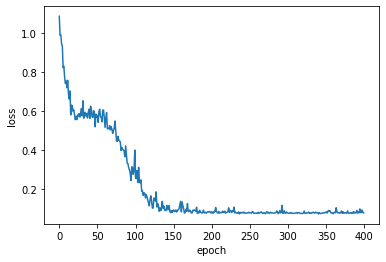

In [35]:

plt.figure()
plt.plot(xx,loss_list)
plt.xlabel('epoch') 
plt.ylabel('loss')
plt.show()
l=[]
for i in range(len(loss_list)):
  l.append(float(loss_list[i].data))
with open("loss9.txt","w")as f:
  print(l,file=f)

In [36]:
#function for creating decoder input for test
def greedy_decoder(model, enc_input, start_symbol):
    """
    For simplicity, a Greedy Decoder is Beam search when K=1. This is necessary for inference as we don't know the
    target sequence input. Therefore we try to generate the target input word by word, then feed it into the transformer.
    Starting Reference: http://nlp.seas.harvard.edu/2018/04/03/attention.html#greedy-decoding
    :param model: Transformer Model
    :param enc_input: The encoder input
    :param start_symbol: The start symbol. In this example it is 'S' which corresponds to index 4
    :return: The target input
    """
    enc_input=enc_input.cuda()
    enc_outputs = model.encoder(enc_input)
    dec_input = torch.zeros(1, 0).type_as(enc_input.data)
    dec_input=dec_input.cuda()
    terminal = False
    next_symbol = start_symbol
    for i in range(8):  
        a= torch.tensor([[next_symbol]],dtype=enc_input.dtype)
        a=a.cuda()      
        dec_input=torch.cat([dec_input.detach(),a],-1)
        dec_input=dec_input.cuda()
        dec_outputs, _, _ = model.decoder(dec_input, enc_input, enc_outputs)
        projected = model.projection(dec_outputs)
        prob = projected.squeeze(0).max(dim=-1, keepdim=False)[1]
        next_word = prob.data[-1]
        next_symbol = next_word
        #print(next_word)            
    return dec_input

In [ ]:
#create test data
import random
code=df.code.values
encode=df.encode.values

# #encode=encode[1:854]
code=code[1:]
encode=encode[1:]
label2=[]
test2=[]
for i in range(1000):
  choose=random.randint(0,255)
  lab=code[choose]

  te=encode[choose]
  label2.append(lab)
  test2.append(te)
enc_inputs, dec_inputs, dec_outputs = make_data(test2,label2)
test_data=MyDataSet(enc_inputs, dec_inputs, dec_outputs)
#test_data=MyDataSet(b1,b2,b3)
test_loader = Data.DataLoader(test_data,batch_size,True)

In [ ]:
  #Test
acc=0
cnt=0
for enc_inputs, _, label in test_loader:
  #print(enc_inputs[:20])
  #print(label[:20])
  #print(label)
  #print(o
    correct=0
    total=0
    enc_inputs=enc_inputs.cuda()
    #print(len(enc_inputs))
    #print(src_vocab)
    for i in range(len(enc_inputs)):
        greedy_dec_input = greedy_decoder(model, enc_inputs[i].view(1, -1), start_symbol=tgt_vocab["S"])
        predict, _, _ = model(enc_inputs[i].view(1, -1), greedy_dec_input)
        #print(predict)
        a=label[i][:-1]
        for j in range(len(a)):
          a[j]=a[j]-1
        
        
        predict = predict.data.max(1, keepdim=True)[1]
        b=[idx2word[n.item()] for n in predict.squeeze()]
        for j in range(8):
          #print(b[j],a[j])
          #print(type(a[j]))
          c=1
          if b[j]=='0.':
            c=0
          if c!=a[j]:
            cnt=cnt+1
            print("real",a)
            print(enc_inputs[i], '->', [idx2word[n.item()] for n in predict.squeeze()])
          
        #print(enc_inputs[i], '->', [idx2word[n.item()] for n in predict.squeeze()])
    
print(cnt)
print("ber=",cnt/1000/8)

real tensor([0, 0, 1, 0, 1, 0, 0, 1])
tensor([1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2], device='cuda:0') -> ['1.', '0.', '1.', '0.', '1.', '0.', '0.', '1.']
real tensor([0, 0, 1, 1, 1, 0, 0, 0])
tensor([1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2], device='cuda:0') -> ['1.', '0.', '1.', '1.', '1.', '0.', '0.', '0.']
real tensor([0, 0, 0, 1, 1, 1, 0, 1])
tensor([1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1], device='cuda:0') -> ['1.', '0.', '0.', '1.', '1.', '1.', '0.', '1.']
real tensor([0, 1, 1, 0, 1, 1, 0, 1])
tensor([1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1], device='cuda:0') -> ['1.', '1.', '1.', '0.', '1.', '1.', '0.', '1.']
real tensor([0, 1, 1, 0, 0, 0, 1, 0])
tensor([1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2], device='cuda:0') -> ['1.', '1.', '1.', '0.', '0.', '0.', '1.', '0.']
real tensor([0, 1, 1, 0, 0, 0, 1, 0])
tensor([1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2], device='cuda:0') -> ['1.', '1.', '1.', '0.', '0.', '0.', '1.', '0.']
real tensor([0, 0, 0, 1, 0, 1, 0, 1])
tensor([1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2], devic